# Identification des paramètres d'un modèle

Une fois que l'on s'est fixé un modèle, se pose la question de la valeur des paramètres de ce modèle. Les valeurs des paramètres du modèle peuvent être tirées de la litérature ou bien être identifiées à partir de données expérimentales. Dans ce chapitre, la question que nous allons nous poser se formule de la manière suivante:

> **Question**: étant donné certaines données expérimentales, et étant donné un modèle de paramètres $\theta$, quelles sont les valeurs $\hat{\theta}$ des paramètres $\theta$ qui permettent d'obtenir des sorties simulées les plus proches des mesures?


Cette question est formulée mathématiquement comme un problème de minimisation d'une **fonction objectif** $J(\theta)$, de la forme:
$$
\hat{\theta}=\text{argmin}_{\theta \in \Omega}J(\theta)
$$
où $\Omega$ est l'ensemble des valeurs des paramètres $\theta$ admissibles.

La notion de proximité qui apparaît dans la question est évidemment à clarifier: on souhaite que les sorties simulées soient proches des valeurs mesurées, mais en quel sens? selon quelle distance?


En mathématique, la **notion de distance** est primordiale, car elle permet justement de quantifier l'éloignement entre deux objets de même nature. Dans ce chapitre, nous allons considérer un distance "intuitive", qui est la distance euclidienne, définie comme la racine de la somme des différences au carré, c'est à dire:
$$
d(x,y) = \sqrt{\sum_{i=1}^N (x_i-y_i)^2}
$$
où $x=(x_1,...,x_N)^T$ et $y=(y_1,...,y_N)^T$ sont deux vecteurs de $\mathbb{R}^n$ qui dans notre cas vont représenter le vecteur des données simulées (obtenues avec le modèle et donc dépendantes des paramètres $\theta$) et le vecteur des données mesurées expérimentalement.

Pour répondre à la question précédente, nous allons donc chercher à minimiser cette distance. Minimiser la racine d'une quantité ou cette quantité revenant au même, par simplicité, nous chercherons à minimiser la somme des distances au carré, ce que l'on appelle le **problème des moindres carrés**. 

## Problème des moindres carrés

Dans le problème de moindres carrés, la fonction objectif $J(\theta)$ considérée est donnée par: 
$$
J(\theta)=\sum_{i=1}^N\beta_i (y_i(\theta)-y_i)^2
$$
où:
- $\theta$ est le **vecteur de paramètres** du modèle
- $N$ est le **nombre d'instants** $t_i$ d'observation
- $y_i$ est le **vecteur des observations (mesures)** à l'instant $t_i$
- $y_i(\hat{\theta})$ est le **vecteur des estimations données** par le modèle à l'instant $t_i$ en fonction de $\theta$
- $\beta_i$ est un **coefficient de pondération** pouvant être différent selon l'instant d'observation

La solution du problème de moindre carrés ainsi que la méthode à utiliser pour la trouver dépend de la forme du modèle utilisé.

## Modèle de regression linéaire
On se place dans un premier temps dans le cas où le modèle considéré s'écrit linéairement par rapport à $\theta$, c'est à dire sous la forme:
$$
y_i(\theta)=\phi_i^T \theta
$$
où $\phi_i$ est un vecteur de même taille que $\theta$ appelé **régresseur**.

Ce type de modèle est appelé **modèle de regression linéaire**.

Le **problème de moindres carrés** évoqué précédemment s'écrit alors dans ce cas:
$$
\min_{\theta \in \Omega} J(\theta)=\sum_{i=1}^N\beta_i (\phi_i^T \theta-y_i)^2
$$

C'est un problème que l'on sait résoudre analytiquement. Sa solution, que l'on sait unique, est appelée **estimateur des moindres carrés** et est donnée par:
$$
\hat{\theta}=\left[ \sum_{i=1}^N \beta_i \phi_i \phi_i^T \right]^{-1} \sum_{i=1}^N \beta_i \phi_i y_i
$$
Cet estimateur existe si la matrice $\sum_{i=1}^N \beta_i \phi_i \phi_i^T$ est inversible. 

**Rappel**: pour rechercher le minimum ou maximum d'une fonction, on se ramène souvent au problème de recherche des points qui annulent la dérivée de cette fonction.

$$ x_{min} = argmin_{x\in \mathbb{R}} f(x) \Longrightarrow f^\prime(x_{min})=0$$

Les modèles de la biologie sont souvent non linéaires. Néanmoins, il est quand même parfois possible de transformer le modèle de sorte à faire apparaître les paramètres de manière linéaire ce qui facilite grandement la résolution du problème de moindres carrés. L'exemple ci-dessous va dans ce sens.

> <u>Exemple</u>: **modèle d'une fonction de croissance de type Monod**
> $$ \mu(S)=k\frac{S}{a+S} $$
> Supposons qu'aux instants $t_i$ $i=1:N$ on mesure le taux de croissance et le substrat. Notons $\mu_i$ et $S_i$ ces mesures. On a alors, pour tout $i=1:N$:
> $$ \mu_i=k\frac{S_i}{a+S_i} $$
> On souhaiterait trouver les paramètres $a$ et $k$ de ce modèle à partir des mesures $S_i$ et $\mu_i$. 

> Le modèle de Monod n'est pas linéaire en les paramètres. Cependant, en multipliant l'équation par $(a+S)$ on a:
> $$ \mu(S)=k\frac{S}{a+S} \Longleftrightarrow (a+S)\mu(S)=k S \Longleftrightarrow S\mu(S)=k S -a\mu(S) \Longleftrightarrow S\mu(S)=[S\, -\mu(S)] \left[\begin{array}{c}k \\ a \end{array}\right] $$
> On retombe donc bien sur un modèle de regression linéaire de la forme:
> $$ y_i(\theta)=\phi_i^T \theta $$
> avec:
> $y_i(\theta)= S_i\mu(S_i)$, $\theta=\left[\begin{array}{c}k \\a \end{array}\right]$ et $\phi_i =\left[\begin{array}{c}S_i \\ -\mu(S_i) \end{array}\right]$

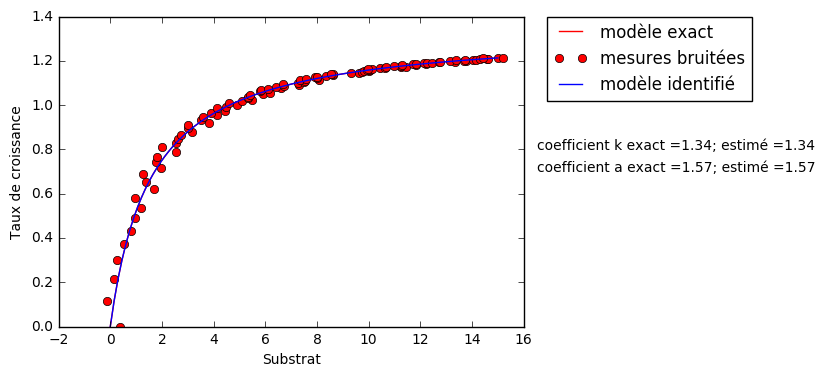

<function __main__.identifMonod>

In [12]:
from IPython.html.widgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def identifMonod(N,sigma1,sigma2):
    # N : nombre d'observation
    # sigma1 : ecart type bruit de mesure sur mu
    # sigma2 : ecart type bruit de mesure sur S
    
    # Generation de donnees d'observation
    # -----------------------------------
    # parametres du modele de Monod
    # mu(S)=k*S/(S+a)
    coeffk = 1.34 # coefficient k
    coeffa = 1.57 # coefficient a
    
    # calcul de mu
    S = np.linspace(0,15,num=N) # mesures du substrat
    mu = coeffk*S/(coeffa+S) # sorties du modèle correspondantes
    mub = mu+sigma1*(np.random.rand(N)-0.5) # bruitage des sorties
    Sb = S + sigma2*(np.random.rand(N)-0.5) # bruitage des entrées
    
    # trace des observations
    plt.figure(1)
    plt.plot(S,mu,'r',label='modèle exact')
    plt.plot(Sb,mub,'ro',label='mesures bruitées')
    plt.xlabel('Substrat')
    plt.ylabel('Taux de croissance')

    # Identification des parametres k et a du modele de Monod
    # -------------------------------------------------------
    beta = np.ones(N) # coefficients de pondération
    
    # calcul de l'estimateur de moindres carrés
    matM = np.zeros((2,2))
    vecb = np.zeros((2,1))
    for i in np.arange(0,N,1):
        phii = np.array([[S[i]], [-mub[i]]]) # regresseur
        matM = matM+beta[i]*(phii*np.transpose(phii)) # matrice à inverser
        vecb = vecb + beta[i]*phii*S[i]*mub[i] 
    theta_hat = np.linalg.solve(matM, vecb) #estimateur des moindres carrés
    
    muhat = theta_hat[0]*S/(theta_hat[1]+S)  # calcul du mu correspondant

    # tracé du modèle identifié et des valeurs des paramètres k et a identifiés
    plt.plot(S,muhat,'b',label='modèle identifié')
    plt.text(16.5,0.8,'coefficient k exact ='+str(coeffk)+'; estimé ='+str(theta_hat[0][0]))
    plt.text(16.5,0.7,'coefficient a exact ='+str(coeffa)+'; estimé ='+str(theta_hat[1][0]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    
interact(identifMonod, N=(2,200,1), sigma1=(0,1,0.1), sigma2=(0,2,0.1))

## Cas non linéaire: algorithme de minimisation

La plupart du temps, et notamment dans le cas où $y_i$ est une fonction non linéaire des paramètres, il est impossible de calculer analytiquement la solution du problème:
$$
\hat{\theta}=\text{argmin}_{\theta \in \Omega}J(\theta)
$$
On doit donc passer par des algorithmes d'optimisation, qui permettent de trouver le minimum (ou maximum) d'une fonction objectif sur un domaine $\Omega$ donné.

Ces algorithmes sont généralement itératifs et démarrent donc d'une valeur initiale que l'utilisateur doit donner. Cette valeur (ou condition) initiale est un première estimation "grossière" des paramètres. 

### Minimum global ou local : importance de la condition initiale

Avant de présenter les algorithmes d'optimisation, une remarque s'impose. Une des difficultés rencontrées par les algorithmes d'optimisation vient du fait que les fonctions non linéaires peuvent posséder des minimums locaux, c'est à dire des valeurs qui sont minimales uniquement dans une région limitée de l'espace. La condition initiale donnée à l'algorithme peut donc être très importante.

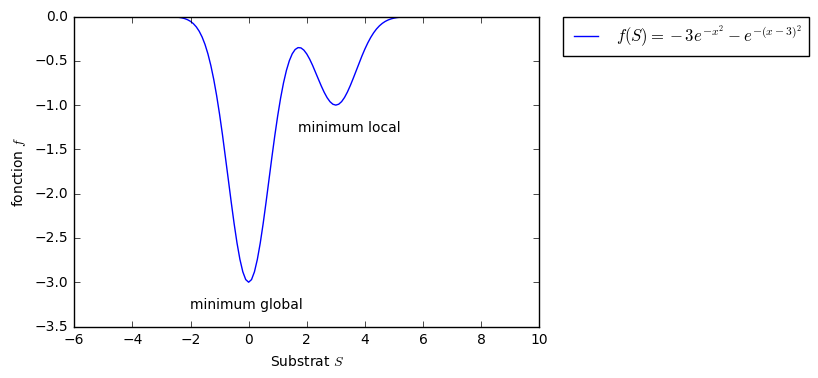

In [13]:
x = np.arange(-5,10,0.1)
f = -3*np.exp(-x**2)-np.exp(-(x-3)**2)

# tracé
plt.figure(1)
plt.plot(x,f,'b',label='$f(S)=-3 e^{-x^2}-e^{-(x-3)^2}$')
plt.text(-2,-3.3,'minimum global')
plt.text(1.7,-1.3,'minimum local')
plt.xlabel('Substrat $S$')
plt.ylabel('fonction $f$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-3.5,0)
plt.show()


### Méthode du gradient

L'**algorithme du gradient** est un algorithme d'optimisation (c'est à dire de minimisation ou maximisation) de fonction. Il est aussi appelé **algorithme de plus forte pente** ou **de plus profonde descente**.

Dans ce paragraphe on s'intéresse donc au problème de la minimisation d'une fonction $f:x\in \Omega \subset \mathbb{R}^n \mapsto f(x) \in \mathbb{R}$ sur un domaine $\Omega$:
$$ \min_{x\in\Omega} f(x)$$

On notera $\nabla f(x)$ le gradient de $f$ en $x$, c'est à dire le vecteur colonne des dérivées partielles de $f$ par rapport aux $x_i$ ($i=1:n$):
$$
\nabla f(x) =\left[ \begin{array}{c} \partial_{x_1}f(x) \\ \vdots \\ \partial_{x_n}f(x) \end{array} \right]
$$

L'algorithme de gradient repose sur la notion de **direction de descente**. Une direction de descente est définie localement autour d'un point $x\in\Omega$: c'est une direction, donc un vecteur $d\in \Omega\backslash \{0\}$ selon laquelle, au voisinage de $x$, la fonction $f$ décroit. Cela assure que si on suit cette direction, on va bien se rapprocher d'un minimum. Mathématiquement, cela s'écrit de la manière suivante. 

$d\in \Omega\backslash \{0\}$ est une **direction de descente** en $x$ pour $f$ si il existe un intervalle $\left[0,\alpha_0 \right]$ tel que:
$$ f(x+\alpha d)\leqslant f(x),\,\,\forall \alpha\in \left[0,\alpha_0 \right] $$
On parlera de **direction de descente stricte** si l'inégalité est stricte ($<$ au lieu de $\leqslant$).

On peut montrer que, si $\nabla f(x) \neq 0$, alors
$$d=-\nabla f(x) \text{ est une direction de descente stricte en $x$ pour $f$}.$$

L'algorithme du gradient est donc donné par:

> <u>Algorithme du gradient</u>:
> - on choisit un nombre d'itérations maximal $N$, un seuil de précision $\epsilon$ et une valeur initiale $x_0$ pour $x$
> - initialisation: $k=0$ et calcul de $\nabla f(x_0)$
> - Tant que $k+1\leqslant N$ et $\left\|\nabla f(x_k)\right\|>\epsilon$ alors
>> $$ x_{k+1} = x_k - \alpha_k \nabla f(x_{k}) $$
>> où $\alpha_k$ peut être choisi selon différentes méthodes. 

Parmi les différents choix possible de $\alpha_k$ on notera les deux suivantes:
- Si $\alpha_k$ est une constante indépendante de $k$, on parlera d'**algorithme de gradient à pas fixe**.
- Le coefficient $\alpha_k$ peut être également choisi de sorte à minimiser $f(x_k-\alpha_k \nabla f(x_{k}))$. On parlera alors d'**algorithme de gradient à pas optimal**.

> <u>Exemple</u>:
> On veut minimiser la fonction:
> $$ f(k,a)=\frac{1}{N}\sum_{i=1}^N \left( k\frac{S_i}{a+S_i}-\mu_i \right)^2 $$
> Le gradient de $f$ est donné par:
> $$ \nabla f(k,a)= \left[ \begin{array}{c} \partial_{k}f(k,a)  \\ \partial_{a}f(k,a) \end{array} \right] = \left[ \begin{array}{c} \frac{2}{N}\sum_{i=1}^N \frac{S_i}{a+S_i}\left( k\frac{S_i}{a+S_i}-\mu_i \right) \\ -\frac{2}{N}\sum_{i=1}^N k\frac{S_i}{(a+S_i)^2}\left( k\frac{S_i}{a+S_i}-\mu_i \right) \end{array} \right]$$

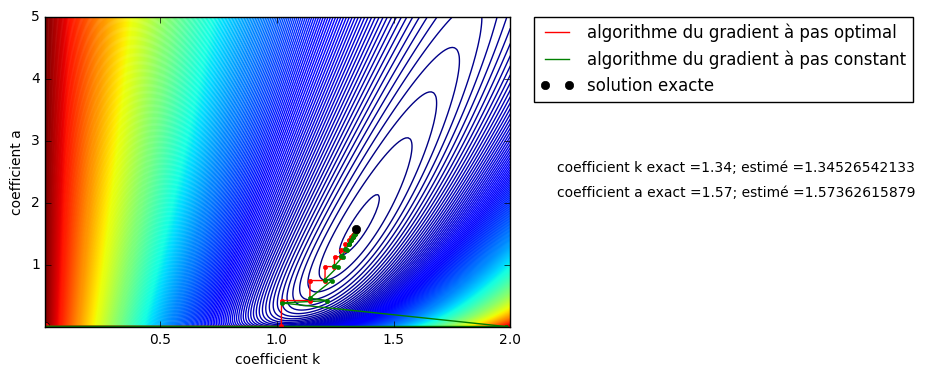

In [14]:
import scipy.optimize as scop
sigma1=0.2
sigma2=0.2
N =100

# Generation de donnees d'observation
# -----------------------------------
# parametres du modele de Monod
coeffk = 1.34 # coefficient k
coeffa = 1.57 # coefficient a
    
# calcul de mu
S = np.linspace(0,15,num=N) # mesures du substrat
mu = coeffk*S/(coeffa+S) # sorties du modèle
mub = mu+sigma1*(np.random.rand(N)-0.5) # bruitage des sorties mesurées
Sb = S + sigma2*(np.random.rand(N)-0.5) # bruitage des entrées mesurées
    
def fonction_f(paramk,parama):
    global mub, Sb, N
    # f : fonction f
    # partialf_k : dérivée partielle de f par rapport à k
    # partialf_a : dérivée partielle de f par rapport à a
    
    # initialisation
    if len(paramk.shape)>0:
        f = np.zeros((np.size(paramk,0),np.size(paramk,1)))
        partialf_k = np.zeros((np.size(paramk,0),np.size(paramk,1)))
        partialf_a = np.zeros((np.size(paramk,0),np.size(paramk,1)))
    else:
        f = 0
        partialf_k = 0
        partialf_a = 0
    # Boucle sur i
    for i in np.arange(0,len(Sb)-1,1):
        mu = paramk*Sb[i]/(parama+Sb[i])
        f = f + (mu-mub[i])**2
        partialf_k = partialf_k + 2*(mu-mub[i])*Sb[i]/(parama+Sb[i])
        partialf_a = partialf_a - 2*(mu-mub[i])*paramk*Sb[i]/((parama+Sb[i])**2)
    # division par N
    f = f/N
    partialf_k = partialf_k/N
    partialf_a = partialf_a/N
    gradf = np.array([partialf_k, partialf_a])
    return [f, gradf]

# Calcul de la fonction f pour le tracé
x , y = np.meshgrid(np.linspace(0.01,2,201),np.linspace(0.01,5,200))
z = fonction_f(x,y)
z = z[0]

# tracé des courbes de niveau de f
plt.figure(1)
graphe = plt.contour(x,y,z,300)
plt.xlabel('coefficient k')
plt.ylabel('coefficient a')

def fonction_falpha(alpha,x,gradfx):
    x1 = x - alpha*gradfx
    f = fonction_f(x1[0],x1[1])
    f = f[0]
    return f

# Algorithme du gradient
alpha_constant = 1 # valeur de alpha pour l'algorithme de gradient à pas constant

Nbiter = 35 # nombre d'itérations

x0 = np.array([0.01,0.01]) # valeur initiale pour l'algorithme à pas optimal
x0c = np.array([0.01,0.01]) # valeur initiale pour l'algorithme à pas constant

# initialisation des vecteurs où seront stockées les valeurs intermédiaires obtenues avec les algorithmes itératifs
xval = np.zeros((Nbiter+1,2))
xvalc = np.zeros((Nbiter+1,2))
xval[0]=x0
xvalc[0]=x0c

plt.plot(x0[0],x0[1],'ro')

# Boucle itératives de l'algorithme
for i in np.arange(1,Nbiter,1):
    # calcul de f et du gradient
    temp = fonction_f(np.asarray(x0[0]),np.asarray(x0[1]))
    fx0 = temp[0]
    gradfx0 = temp[1]
    # calcul de la valeur de alpha optimale
    alphaopt = scop.minimize(fonction_falpha,0,args=(x0,gradfx0),method='Nelder-Mead')
    if alphaopt.success == True:
        alpha_k = alphaopt.x
    else:
        alpha_k = alpha_constant    
    # stockage et mise à jour des valeurs de paramètres
    xval[i] = x0 - alpha_k*gradfx0 
    xvalc[i] = x0 - alpha_constant*gradfx0
    # Tracé
    plt.plot(np.array([x0[0],xval[i][0]]),np.array([x0[1],xval[i][1]]),'r')
    plt.plot(np.array([x0c[0],xvalc[i][0]]),np.array([x0c[1],xvalc[i][1]]),'g')
    # mise à jour pour l'itération d'après et tracé
    x0 = xval[i]
    x0c = xvalc[i]
    plt.plot(x0[0],x0[1],'r.')
    plt.plot(x0c[0],x0c[1],'g.')

# Tracé des solutions
plt.plot(np.array([x0[0],xval[i][0]]),np.array([x0[1],xval[i][1]]),'r',label='algorithme du gradient à pas optimal')
plt.plot(np.array([x0c[0],xvalc[i][0]]),np.array([x0c[1],xvalc[i][1]]),'g',label='algorithme du gradient à pas constant')
plt.plot(coeffk,coeffa,'ko',label='solution exacte')
plt.text(2.2,2.5,'coefficient k exact ='+str(coeffk)+'; estimé ='+str(x0[0]))
plt.text(2.2,2.1,'coefficient a exact ='+str(coeffa)+'; estimé ='+str(x0[1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Méthode de Newton-Raphton

La méthode de Newton-Raphton est un algorithme qui est destiné à trouver une approximation numérique d'un zéro (ou racine) d'une fonction $f$, c'est à dire la valeur de $x$ telle que $f(x)=0$.

Cette méthode peut être également utilisée en optimisation car le problème de minimisation d'une fonction $g$ revient au problème de recherche des zéros de la dérigée $g^\prime$ de la fonction.

> <u>Algorithme de Newton-Raphton</u>:
> - on choisit un nombre d'itérations maximal $N$, un seuil de précision $\epsilon$ et une valeur initiale $x_0$ pour $x$
> - initialisation: $k=0$ et calcul de $f(x_0)$
> - Tant que $k+1\leqslant N$ et $f(x_k)>\epsilon$ alors
>> $$ x_{k+1} = x_k - \frac{f(x_k)}{f^\prime(x_{k})} $$

**D'où vient cette formule?**

Si on considère le développement de Taylor du premier ordre en $x_k$, on a:
$$ f(x) = f(x_k)+f^\prime(x_k)(x-x_k)+R_1(x) $$
où $R_1(x)$ est une fonction de $x$ négligeable par rapport aux autres termes du développement au voisinage de $x_k$.

Cela veut dire que si $x$ est proche de $x_k$ alors on peut négliger $R_1(x)$ et on a alors:
$$f(x) \simeq f(x_k)+f^\prime(x_k)(x-x_k)$$
Rappelons que la droite d'équation $y=f(x_k)+f^\prime(x_k)(x-x_k)$ est la tangente au graphe de $f$ en $x_k$. Faire cette approximation revient donc à considérer qu'autour de $x_k$ la courbe de $f$ est à peu près égale à sa tangente.

Au lieu de chercher le zéro de $f$ on va alors chercher le zéro de son approximation, c'est à dire de la tangente qui va nous donner une nouvelle valeur $x_{k+1}$ supposée plus proche du zéro de $f$ que $x_k$. Le point $x_{k+1}$ est donc défini par:
$$ 0 = f(x_k)+f^\prime(x_k)(x_{k+1}-x_k) \Longleftrightarrow x_{k+1} = x_k - \frac{f(x_k)}{f^\prime(x_{k})}$$

> **Exemple**
> On cherche à trouver la valeur du point d'équilibre du modèle de croissance d'une population de micro-organisme $B$ sur un substrat $S$ dans un réacteur batch donné par:
> $$
\left\{
\begin{array}{crl}
\frac{dB}{dt}= & \mu(S)B &-\frac{Q}{V}B\\
\frac{dS}{dt}= & -k\mu(S)B&+\frac{Q}{V}(S_0-S)  \\
\end{array}
\right.
$$
> Trouver l'équilibre pour lequel $B\neq 0$ revient à résoudre l'équation $\mu(S)=\frac{Q}{V}$. Nous allons résoudre cette équation grâce à l'algorithme de Newphton-Raphton.

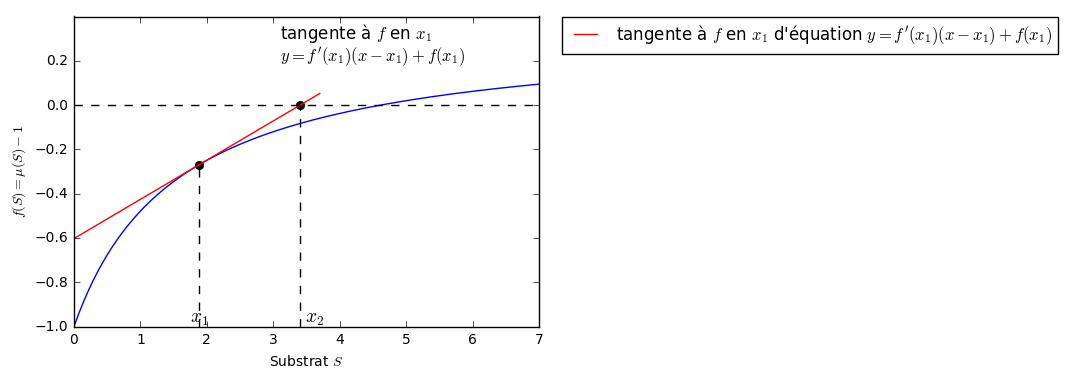

In [15]:
def fonction_f(S):
    # parametres du modele de Monod
    coeffk = 1.34 # coefficient k
    coeffa = 1.57 # coefficient a
    
    # calcul de mu(S) et f=mu(S)-1
    mu = coeffk*S/(coeffa+S)
    muprime = coeffk*coeffa/((coeffa+S)**2)
    f = mu-1 # fonction f
    fprime = muprime
    return [f, fprime]

# Calcul de la fonction f pour le tracé
N = 200
S = np.linspace(0,7,num=N) # mesures du substrat
f = fonction_f(S)

def plot_iter(i):
    global xval
    # Première itération de l'algorithme de Newton
    x0 = xval[i] # valeur initiale du zéro
    temp = fonction_f(x0) 
    fx0 = temp[0]
    fprimex0 = temp[1]
    x1 = x0 - fx0/fprimex0 # mise à jour de la valeur du zéro 
    
    # tracé
    plt.figure(1)
    plt.plot(S,f[0],'b')
    plt.plot(x0,fx0,'ko')
    plt.text(x0*0.93,-0.98,'$x_{'+str(i)+'}$',fontsize=14)
    plt.plot(x1,0,'ko')
    plt.text(x1*1.02,-0.98,'$x_{'+str(i+1)+'}$',fontsize=14)
    plt.plot(np.array([0, 3.7]), fprimex0*(np.array([0, 3.7])-x0)+fx0,'r',
             label='tangente à $f$ en $x_{'+str(i)+'}$ d\'équation $y=f^\prime(x_{'+str(i)+'})(x-x_{'+str(i)+'})+f(x_{'+str(i)+'})$')
    plt.text(3.1,0.3,'tangente à $f$ en $x_{'+str(i)+'}$' ,fontsize=12)
    plt.text(3.1,0.2,'$y=f^\prime(x_{'+str(i)+'})(x-x_{'+str(i)+'})+f(x_{'+str(i)+'})$',fontsize=12)
    plt.plot(np.array([0, 7]), np.array([0, 0]),'k--')
    plt.plot(np.array([x0, x0]), np.array([-1, fx0]),'k--')
    plt.plot(np.array([x1, x1]), np.array([-1, 0]),'k--')
    plt.xlabel('Substrat $S$')
    plt.ylabel('$f(S)=\mu(S)-1$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(-1,0.4)
    plt.show()

# Algorithme complet de Newton
Nbiter = 8
x0 = 0.5 # valeur initiale du zéro
xval = np.zeros((Nbiter+1,1))
xval[0]=x0
for i in np.arange(1,Nbiter,1):
    temp = fonction_f(x0) 
    fx0 = temp[0]
    fprimex0 = temp[1]
    xval[i] = x0 - fx0/fprimex0 # mise à jour de la valeur du zéro
    x0 = xval[i]
    
interact(plot_iter, i=(0,Nbiter-1,1))

## Quelques remarques pour finir

### Analyse de sensibilité: quels paramètres doit on identifier?

Avant d'identifier les paramètres d'un modèle, il peut être intéressant, surtout si le nombre de paramètres est important, de faire une analyse de sensibilité. Cette analyse permet de quantifier l'impact de la variation des paramètres sur les sorties du modèle. 

Les résultats de l'analyse de sensibilité pourront être utilisés pour réduire le nombre de paramètres à identifier: seuls les paramètres ayant un impact non négligeable sur la sortie seront identifiés.

### Fonctions pré-codées

Il existe évidemment et heureusement des fonctions déjà codées en python/scilab/R/etc qui reprennent les algorithmes de minimisation.
